1. Data 
+ Pre-processing 
+ Feature-Extractor
+ Split Training, Test, Validation
+ Build Model
+ Gradient Descent 
+ Evaluation
+ Predicat
+ Analysis

# House Price Predict

## load data

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np

In [2]:
dataframe = load_boston()
dataframe

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [3]:
print(dataframe['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
# 导入csv
data = pd.DataFrame(dataframe['data'],columns=dataframe['feature_names'])
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


## Data processing

In [6]:
# 观察数据类别，哪些数据需要onehot

In [7]:
data['CHAS'] = data['CHAS'].astype('int')
data['CHAS'] = data['CHAS'].astype('category')
data['CHAS']

0      0
1      0
2      0
3      0
4      0
      ..
501    0
502    0
503    0
504    0
505    0
Name: CHAS, Length: 506, dtype: category
Categories (2, int64): [0, 1]

In [8]:
data['RAD'] = data['RAD'].astype('int')
data['RAD'] = data['RAD'].astype('category')
data['RAD']

0      1
1      2
2      2
3      3
4      3
      ..
501    1
502    1
503    1
504    1
505    1
Name: RAD, Length: 506, dtype: category
Categories (9, int64): [1, 2, 3, 4, ..., 6, 7, 8, 24]

In [9]:
from sklearn.preprocessing import OneHotEncoder

In [10]:
onehoter = OneHotEncoder()
chas_and_rad = onehoter.fit_transform(data[['CHAS','RAD']])
chas_and_rad.toarray()

/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.]])

In [10]:
# feature scaling

In [11]:
data.std()

CRIM         8.601545
ZN          23.322453
INDUS        6.860353
CHAS         0.253994
NOX          0.115878
RM           0.702617
AGE         28.148861
DIS          2.105710
RAD          8.707259
TAX        168.537116
PTRATIO      2.164946
B           91.294864
LSTAT        7.141062
dtype: float64

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
data.shape

(506, 13)

In [14]:
data.drop(columns = ['CHAS','RAD'])

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,273.0,21.0,393.45,6.48


In [15]:
standar = StandardScaler()
after_scale = standar.fit_transform(data.drop(columns = ['CHAS','RAD']))
after_scale

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

标准化，均值接近0，标准差接近1的分布

In [16]:
np.mean(after_scale,axis = 0)

array([-1.12338772e-16,  7.89881994e-17,  2.10635198e-16, -1.96592852e-16,
       -1.08828186e-16, -1.47444639e-16, -8.42540793e-17,  0.00000000e+00,
       -4.21270397e-16, -7.44244367e-16, -3.08931624e-16])

In [17]:
np.std(after_scale,axis = 0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [18]:
# 合并数据
X = np.concatenate((after_scale,chas_and_rad.toarray()),axis = 1)
X

array([[-0.41978194,  0.28482986, -1.2879095 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.41733926, -0.48772236, -0.59338101, ...,  0.        ,
         0.        ,  0.        ],
       [-0.41734159, -0.48772236, -0.59338101, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  0.        ,
         0.        ,  0.        ],
       [-0.40776407, -0.48772236,  0.11573841, ...,  0.        ,
         0.        ,  0.        ],
       [-0.41500016, -0.48772236,  0.11573841, ...,  0.        ,
         0.        ,  0.        ]])

In [19]:
??np.concatenate

Docstring:
concatenate((a1, a2, ...), axis=0, out=None)

Join a sequence of arrays along an existing axis.

Parameters
----------
a1, a2, ... : sequence of array_like
    The arrays must have the same shape, except in the dimension
    corresponding to `axis` (the first, by default).
axis : int, optional
    The axis along which the arrays will be joined.  If axis is None,
    arrays are flattened before use.  Default is 0.
out : ndarray, optional
    If provided, the destination to place the result. The shape must be
    correct, matching that of what concatenate would have returned if no
    out argument were specified.

Returns
-------
res : ndarray
    The concatenated array.

See Also
--------
ma.concatenate : Concatenate function that preserves input masks.
array_split : Split an array into multiple sub-arrays of equal or
              near-equal size.
split : Split array into a list of multiple sub-arrays of equal size.
hsplit : Split array into multiple sub-arrays horizontally 

## Feature Extractor

In [20]:
y = dataframe['target']
y.shape

(506,)

In [21]:
X.shape

(506, 22)

## Split Training, Test, Validation

In [22]:
def splitdata(x,y,test_ratio = 0.2,val_ratio = 0.2):
    '''
    打乱数据：往往先生成重新打乱的下标序号index，根据序号取x&y
    '''
    indices = np.random.choice(range(len(X)),size = len(X),replace = False)
    
    train_indices = indices[:int(len(X)*(1-test_ratio)*(1-val_ratio))]
    val_indices = indices[int(len(X)*(1-test_ratio)*(1-val_ratio)): int(len(X)*(1-test_ratio))]
    test_indices = indices[int(len(X)*(1-test_ratio)):]
    
    return (x[train_indices], y[train_indices]), (x[val_indices], y[val_indices]), (x[test_indices], y[test_indices]) 
    

In [23]:
??np.random.choice

Docstring:
choice(a, size=None, replace=True, p=None)

Generates a random sample from a given 1-D array

        .. versionadded:: 1.7.0

Parameters
----------
a : 1-D array-like or int
    If an ndarray, a random sample is generated from its elements.
    If an int, the random sample is generated as if a were np.arange(a)
size : int or tuple of ints, optional
    Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
    ``m * n * k`` samples are drawn.  Default is None, in which case a
    single value is returned.
replace : boolean, optional
    Whether the sample is with or without replacement
p : 1-D array-like, optional
    The probabilities associated with each entry in a.
    If not given the sample assumes a uniform distribution over all
    entries in a.

Returns
-------
samples : single item or ndarray
    The generated random samples

Raises
------
ValueError
    If a is an int and less than zero, if a or p are not 1-dimensional,
    if a is an array-like of size 0

In [24]:
(X_train, y_train), (X_val, y_val), (X_test, y_test) = splitdata(X, y)

- sklearn.model_selection.train_test_split 也可以实现

## Build model

In [25]:
X_train

array([[-0.40718105,  0.370669  , -0.60943104, ...,  0.        ,
         0.        ,  0.        ],
       [-0.40969587, -0.48772236,  2.11761463, ...,  0.        ,
         0.        ,  0.        ],
       [-0.40712984, -0.48772236, -1.20328208, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.33320724, -0.48772236, -0.43725801, ...,  0.        ,
         0.        ,  0.        ],
       [-0.41299272,  2.5166474 , -1.29812315, ...,  0.        ,
         0.        ,  0.        ],
       [-0.4133465 , -0.48772236, -0.98441806, ...,  0.        ,
         0.        ,  0.        ]])

In [26]:
y_train

array([24.4, 20.5, 21.4, 20.1, 18.2, 50. , 36. , 21.7, 13.8, 14. , 20. ,
       14.1, 21.4, 26.2,  7.2, 21.8, 29.9, 24.8, 15.6, 28.4, 14.5, 24.6,
       34.9, 36.5, 23.1, 31.5, 30.8, 24.8, 20.6, 17.4, 22. , 22.8, 28.1,
       44.8, 41.7, 22.8,  9.6, 17.8, 21. , 33.1,  5. , 22.7, 26.6, 23.8,
       23.5, 13.1, 11.9, 19.9, 29.8, 34.9, 25. , 21.6, 11.7, 19.1, 22.1,
        8.3, 24.7, 27. , 12.8, 31.6, 23.4, 35.4,  7. , 34.6, 25.1, 20.2,
       42.8, 22.9, 50. , 21.7, 16.8, 48.8, 20.9, 20. , 22.6, 19.5, 17.4,
       21.7, 23.6, 13.4, 50. , 37.3, 13.2, 14.3, 30.1, 37. , 23.6, 18.7,
       22.3, 24.1, 18.9, 24.5, 11.8,  7. , 13.8, 18.4, 10.5, 17.2, 13.6,
       13.8,  7.2, 23.2, 24.6,  7.4, 22.9, 13.3, 23.3, 27.5, 23.9, 27.1,
       45.4, 16.1, 20. , 20.4, 20.3, 24.1, 15. , 14.4, 18.7, 22.8,  7.2,
       23. , 28.4, 33.1, 32.7, 23.1, 17.2, 30.1, 18.5, 28. , 19.3, 14.4,
       42.3, 28.7, 22.6, 21.1, 22.2, 50. , 46. , 19.2, 18.8, 36.4, 14.6,
       22.5, 18.4, 23.9, 11. , 17.8, 23.3, 12.7, 30

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
regression = LinearRegression() # 调用
regression.fit(X_train,y_train) # 拟合、训练

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## 模型评价

In [29]:
??regression.score

Signature: regression.score(X, y, sample_weight=None)
Source:   
    def score(self, X, y, sample_weight=None):
        """Returns the coefficient of determination R^2 of the prediction.

        The coefficient R^2 is defined as (1 - u/v), where u is the residual
        sum of squares ((y_true - y_pred) ** 2).sum() and v is the total
        sum of squares ((y_true - y_true.mean()) ** 2).sum().
        The best possible score is 1.0 and it can be negative (because the
        model can be arbitrarily worse). A constant model that always
        predicts the expected value of y, disregarding the input features,
        would get a R^2 score of 0.0.

        Parameters
        ----------
        X : array-like, shape = (n_samples, n_features)
            Test samples. For some estimators this may be a
            precomputed kernel matrix instead, shape = (n_samples,
            n_samples_fitted], where n_samples_fitted is the number of
            samples used in the fitting for the e

In [30]:
regression.score(X_train, y_train) # 有underfitting

0.7771303417709337

In [31]:
regression.score(X_val, y_val)

0.7300480063978904

In [32]:
regression.score(X_test, y_test) # 有overfitting

0.6021923055856344

### 经典机器学习的模型可解释
- 权重大的对房价影响大

In [33]:
regression.coef_ # 权重

array([-1.09184399,  1.69961794,  0.55051502, -1.78755651,  2.46707392,
        0.02155298, -2.96191204, -1.61654069, -2.14580029,  0.99491696,
       -3.86281153, -1.4718743 ,  1.4718743 , -3.2031025 , -2.9879169 ,
        0.46468117, -0.69746661,  0.0406121 , -1.93263386,  1.04465783,
        2.87476523,  4.39640353])

## 预测 (做预测的数据也一定要经过processing)

In [34]:
X_test[0]

array([ 0.73446946, -0.48772236,  1.01599907,  1.60072524, -0.04791752,
        0.99658854, -0.75918481,  1.53092646,  0.80657583,  0.34917061,
        0.53082925,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ])

In [35]:
regression.predict([X_test[0]])

array([18.10790173])

## 图像

In [36]:
import matplotlib.pyplot as plt

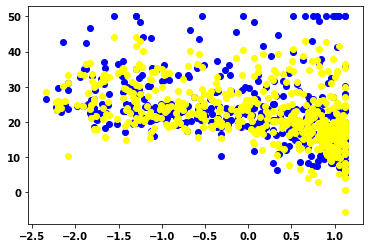

In [37]:
# 原始X有22维特征，将其投影到第五个维度观察
plt.scatter(X[:,5],y,color = 'blue')
plt.scatter(X[:,5],regression.predict(X),color='yellow')

可以看到除异常值外，预测还比较准确

In [38]:
# 观察各个维度

In [39]:
import matplotlib

In [40]:
%matplotlib inline

In [41]:
matplotlib.colors

<module 'matplotlib.colors' from '/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py'>

In [42]:
X_train.shape[1]

22

In [43]:
def show_predict_res(x,y):
    width = 3
    fig,ax = plt.subplots(x.shape[1]//width + 1 , width, figsize = (40,40))
    for i in range(x.shape[1]):
        idx = np.unravel_index(i,ax.shape)
        
        plt.sca(ax[idx])
        ax[idx].title.set_text('Feature {}'.format(i))
        plt.scatter(x[:,i],y)
        plt.scatter(x[:,i],regression.predict(x))

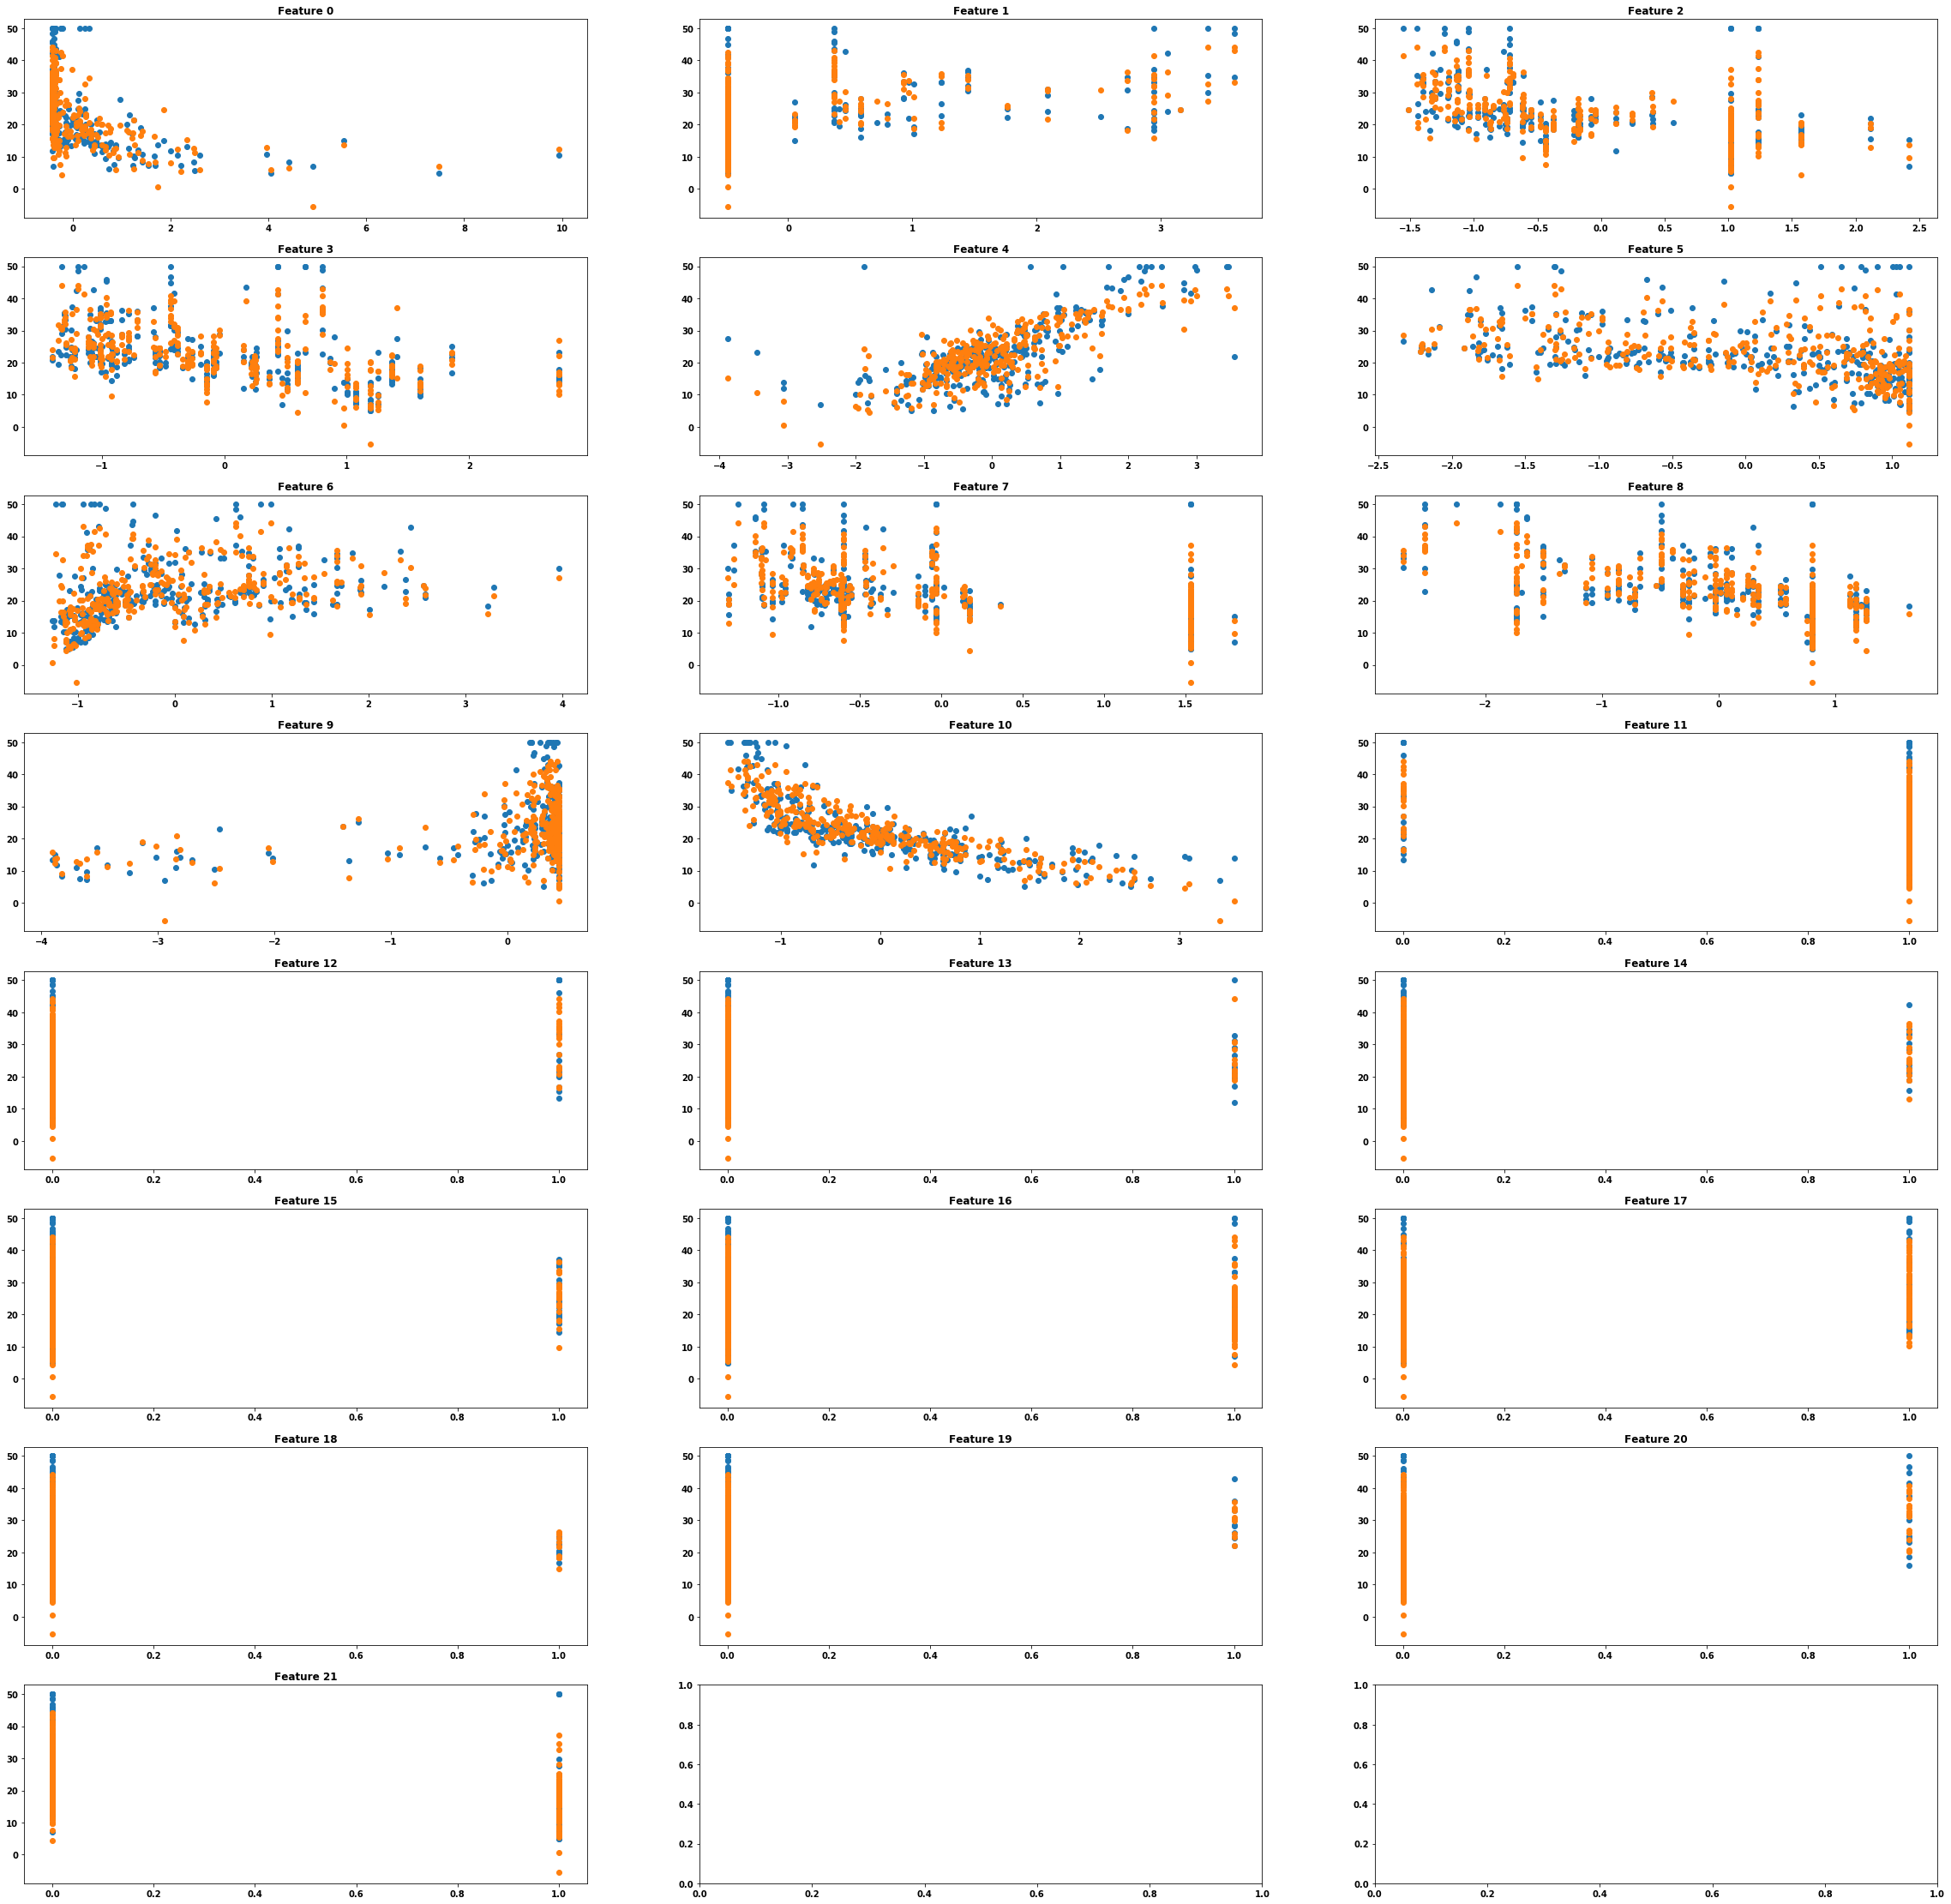

In [44]:
show_predict_res(X_train,y_train)

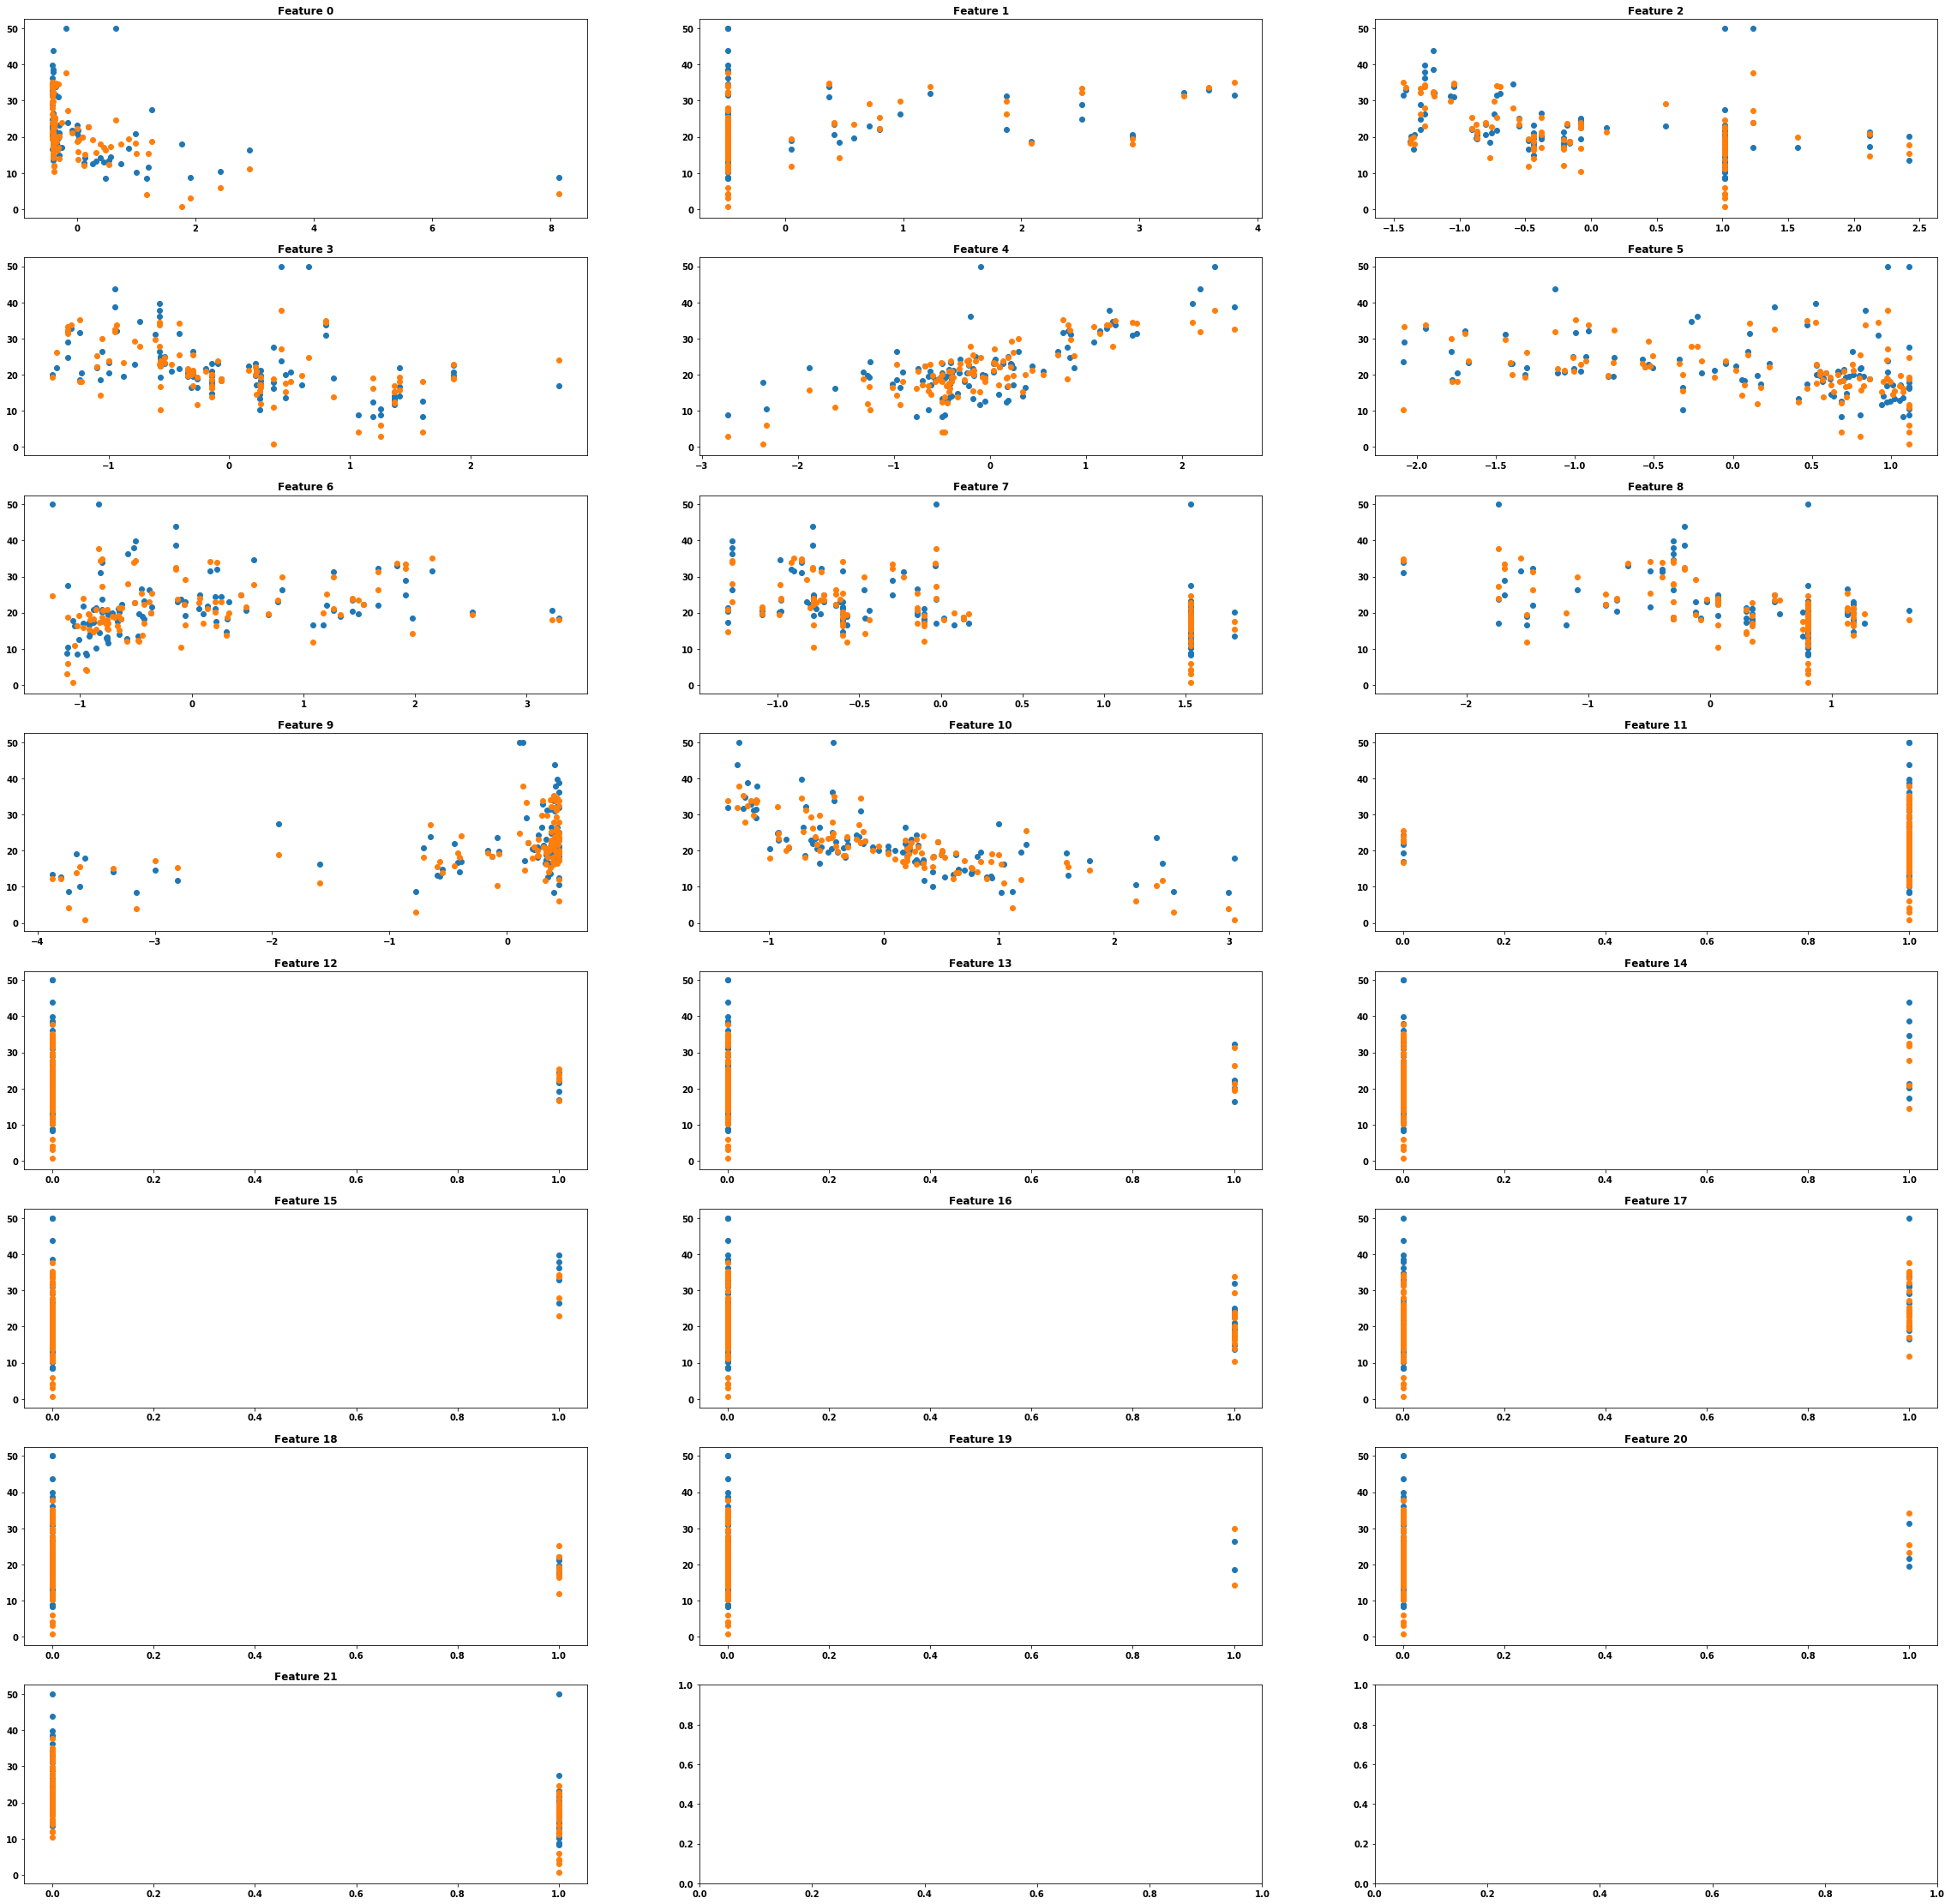

In [45]:
show_predict_res(X_test,y_test)

# 不用sklearn

In [302]:
# 不使用sklearn
def model(w,b,x):
    x = np.array(x)
    return np.dot(x,w)+b

def MSE_loss(y,y_pred):
    y,y_pred = np.array(y),np.array(y_pred)
    return (np.sum((y-y_pred)**2))/len(y)
    
# 计算梯度
def gradient_w(x,y,y_pred):
    x,y,y_pred = np.array(x),np.array(y),np.array(y_pred)
    return -2*np.sum(np.dot(x.T,(y - y_pred)))/len(y)

def gradient_b(y,y_pred):
    y,y_pred = np.array(y),np.array(y_pred)
    return -2*np.sum(y - y_pred)/len(y)

In [303]:
try_time = 1000
min_loss = float('inf')
optimal_func = None
learning_rate = 0.022

threshold = 1e-2

In [304]:
import random
# X_train.shape = (323,22)
# y_train.shape = (323,)

k,b = np.random.random((X_train.shape[1])),np.random.random((X_train.shape[0]))
print(k.shape,b.shape)
print('k = {}  b = {}'.format(k,b))

(22,) (323,)
k = [0.44803873 0.20460453 0.06421147 0.45728402 0.72724068 0.6024928
 0.52673965 0.17732237 0.21082519 0.47232019 0.6528503  0.58163541
 0.52921932 0.10135201 0.61924567 0.95557    0.60409374 0.24242666
 0.49609559 0.54125246 0.548783   0.53336462]  b = [0.71289592 0.93848341 0.71029315 0.89753528 0.41414105 0.28661015
 0.09365656 0.25860166 0.37343179 0.44663811 0.52371265 0.79822758
 0.7054767  0.50898611 0.25949818 0.94469454 0.44202223 0.35070113
 0.93079798 0.85876058 0.13015099 0.75384919 0.37155198 0.02856905
 0.77229994 0.71315978 0.58890408 0.28013954 0.62405981 0.52011072
 0.55229036 0.74329728 0.57676059 0.03426918 0.37821064 0.9514674
 0.26284218 0.13047501 0.16840481 0.07504849 0.62979156 0.99310597
 0.53098915 0.36170068 0.7598741  0.60947462 0.66500554 0.45726275
 0.16499954 0.9234527  0.62924999 0.01382883 0.88280825 0.2503861
 0.48030792 0.24564488 0.63313015 0.66142397 0.80356076 0.10167432
 0.08005955 0.899959   0.80832861 0.18167736 0.62378912 0.406384

In [305]:
y_pred = model(k,b,X_train)
print(y_pred.shape)
loss = MSE_loss(y_train,y_pred)
print(loss)

(323,)
550.8967945955887


In [306]:
for t in range(try_time):
    
    y_pred = model(k,b,X_train)
    loss = MSE_loss(y_train,y_pred)
    if loss < min_loss:
        min_loss = loss
        best_k,best_b = k,b
    k -= learning_rate*gradient_w(X_train,y_train,y_pred)
    b -= learning_rate*gradient_b(y_train,y_pred)
    if t%10 == 0:
        print('第{}次 ： loss = {}'.format((t),loss))
    if loss < threshold:
        print('第{}次 ： loss = {}'.format((t),loss))

第0次 ： loss = 550.8967945955887
第10次 ： loss = 297.26510329900236
第20次 ： loss = 183.48740684588853
第30次 ： loss = 125.91236444244034
第40次 ： loss = 96.7776077098244
第50次 ： loss = 82.03451739786883
第60次 ： loss = 74.57405654894919
第70次 ： loss = 70.79883202677911
第80次 ： loss = 68.88845135708387
第90次 ： loss = 67.9217395014808
第100次 ： loss = 67.43255332691979
第110次 ： loss = 67.18500995399573
第120次 ： loss = 67.05974533151615
第130次 ： loss = 66.9963575483588
第140次 ： loss = 66.96428136456431
第150次 ： loss = 66.9480498209518
第160次 ： loss = 66.93983615657912
第170次 ： loss = 66.93567978771871
第180次 ： loss = 66.93357653619543
第190次 ： loss = 66.93251222570738
第200次 ： loss = 66.9319736515985
第210次 ： loss = 66.93170111639941
第220次 ： loss = 66.93156320513793
第230次 ： loss = 66.9314934177633
第240次 ： loss = 66.93145810318778
第250次 ： loss = 66.93144023291755
第260次 ： loss = 66.93143119000668
第270次 ： loss = 66.93142661401339
第280次 ： loss = 66.9314242984189
第290次 ： loss = 66.93142312665628
第300次 ： loss = 66.9314225

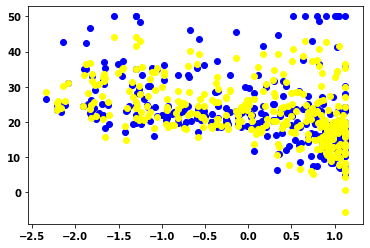

In [307]:
plt.scatter(X_train[:,5],y_train,color = 'blue') # 原始
plt.scatter(X_train[:,5],regression.predict(X_train),color='yellow') # 预测

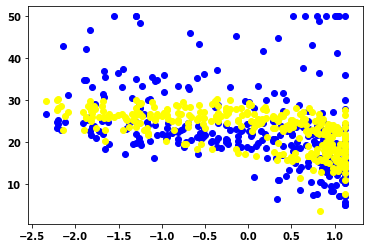

In [308]:
plt.scatter(X_train[:,5],y_train,color = 'blue') # 原始
plt.scatter(X_train[:,5],model(k,b,X_train),color='yellow') # 预测

In [309]:
??regression.score

Signature: regression.score(X, y, sample_weight=None)
Source:   
    def score(self, X, y, sample_weight=None):
        """Returns the coefficient of determination R^2 of the prediction.

        The coefficient R^2 is defined as (1 - u/v), where u is the residual
        sum of squares ((y_true - y_pred) ** 2).sum() and v is the total
        sum of squares ((y_true - y_true.mean()) ** 2).sum().
        The best possible score is 1.0 and it can be negative (because the
        model can be arbitrarily worse). A constant model that always
        predicts the expected value of y, disregarding the input features,
        would get a R^2 score of 0.0.

        Parameters
        ----------
        X : array-like, shape = (n_samples, n_features)
            Test samples. For some estimators this may be a
            precomputed kernel matrix instead, shape = (n_samples,
            n_samples_fitted], where n_samples_fitted is the number of
            samples used in the fitting for the e

In [310]:
def model_score(y,y_pred):
    u = np.sum((y-y_pred)**2)
    v = np.sum((y-np.mean(y))**2)
    return 1-u/v

In [311]:
model_score(y_train,model(k,b,X_train))

0.2711838617220774

In [312]:
model_score(y_train,regression.predict(X_train))

0.7771303417709337